
Fuzzy neural networks combine the strengths of both neural networks and FL, making them a very powerful hybrid tool. They allow the integration of expert knowledge into the system, and are considered inherently more understandable because of their use of human-like fuzzy inference.

Apply single- and multilayer FNNs and FFNN (Deep Learning: Feed Forward Neural Networks (FFNNs)
a.k.a. Multi-Layered Perceptrons (MLPs) in a binary classification setting using the popular python library sklearn

Apply AE (autoencoder) for data reduction and using the output for a classification model

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as mx
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [52]:
#!pip install categorical_embedder
# Necessary imports


In [86]:
df = pd.read_csv('df_mock.csv')

In [87]:
df['Conversion_Binarized'] = np.where(df['CONVERSION_TYPE'] == 'other:80ignqj', '1', '0')


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498066 entries, 0 to 499999
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             498066 non-null  int64  
 1   IMPRESSION_ID          498066 non-null  object 
 2   PARTNER_ID             498066 non-null  object 
 3   CONVERSION_TYPE        498066 non-null  object 
 4   CAMPAIGN_ID            498066 non-null  object 
 5   AD_GROUP_ID            498066 non-null  object 
 6   MATCHED_FOLD_POSITION  498066 non-null  int64  
 7   CITY                   498066 non-null  object 
 8   ZIP_POSTAL_CODE        498066 non-null  float64
 9   SUPPLY_VENDOR          498066 non-null  object 
 10  SITE                   498066 non-null  object 
 11  OS_FAMILY              498066 non-null  float64
 12  BROWSER                498066 non-null  float64
 13  USER_HOUR_OF_WEEK      498066 non-null  float64
 14  DEVICE_MODEL           498066 non-nu

In [89]:
df = df.drop(columns=['Conversion_Binarized', 'AUDIENCE_ID', 'CREATIVE_ID', 'METRO', 'AD_FORMAT', 'REGION',], axis=1)


In [90]:
df = df.dropna()


In [92]:
# Create feature matrix and target vector
X = df.iloc[:,6:]
y = df['CONVERSION_TYPE']

In [94]:
cat_cols = ['CITY', 'SUPPLY_VENDOR', 'SITE', 'DEVICE_MODEL']
cont_cols = ['MATCHED_FOLD_POSITION', 'ZIP_POSTAL_CODE', 'OS_FAMILY', 'BROWSER', 'USER_HOUR_OF_WEEK']
y_col = ['Conversion_Binarized']  # this column contains the labels


###categorify

# Convert our three categorical columns to category dtypes.
for cat in cat_cols:
    X[cat] = X[cat].astype('category')

In [96]:
X[cat_cols] = X[cat_cols].apply(lambda x: x.cat.codes)

In [97]:
X

,MATCHED_FOLD_POSITION,CITY,ZIP_POSTAL_CODE,SUPPLY_VENDOR,SITE,OS_FAMILY,BROWSER,USER_HOUR_OF_WEEK,DEVICE_MODEL
0,4,2658,4158.0,4,4054,6.0,6.0,48.0,569
1,2,2658,4158.0,19,4566,6.0,6.0,51.0,569
2,4,2659,4164.0,14,3670,6.0,6.0,138.0,569
3,4,2659,4164.0,17,3670,6.0,6.0,138.0,569
4,2,2658,4158.0,17,4565,6.0,6.0,72.0,569
...,...,...,...,...,...,...,...,...,...
499995,4,448,4670.0,14,4072,6.0,6.0,109.0,118
499996,2,2097,4208.0,32,1947,6.0,6.0,118.0,611
499997,2,2097,4208.0,8,1947,6.0,6.0,118.0,611
499998,2,388,4305.0,20,1195,6.0,6.0,94.0,611


In [98]:
# enter your CID here, or date of birth, or another number of your choosing to use as random state
CID = 0

# remember to check the documentation of each algorithm if setting the random_state is needed
# for this tutorial and all upcoming tutorials...

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=CID)


In [100]:
# Instantiate scaler model
scaler = StandardScaler()

# Fit and Transform X_train
X_train_scaled = scaler.fit_transform(X_train)

# Transform X_test
X_test_scaled = scaler.transform(X_test)

In [101]:
y_train.value_counts()# Calculate the baseline accuracy


other:wrue3bs    153202
other:abl9tbr     69710
other:yydh9hr     46577
other:r2qt4kx     25610
other:1xhpzmz     13935
                  ...  
other:76zif6r         1
other:ykd7viz         1
other:82jlkse         1
other:5cerkzp         1
other:igsgot5         1
Name: CONVERSION_TYPE, Length: 110, dtype: int64

In [102]:
y_test.value_counts()


other:wrue3bs    38090
other:abl9tbr    17632
other:yydh9hr    11552
other:r2qt4kx     6440
other:1xhpzmz     3469
                 ...  
other:igsgot5        1
other:6r62ie2        1
other:82j7rpz        1
other:irelp55        1
other:oxzmf8v        1
Name: CONVERSION_TYPE, Length: 100, dtype: int64

In [103]:
from sklearn.neural_network import MLPClassifier 


In [106]:
classifier = MLPClassifier(hidden_layer_sizes=(100), max_iter=50,activation = 'relu',solver='adam',random_state=42) ### single layer of 100 neruons 


In [107]:
#Fitting the training data to the network
classifier.fit(X_train_scaled, y_train)

#Using the trained network to predict

#Predicting y for X_val
y_pred = classifier.predict(X_test_scaled)

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [108]:
classifier.coefs_[1].shape  ### Change here the number from try 1 and 0 and look at the shape difference 


(100, 110)

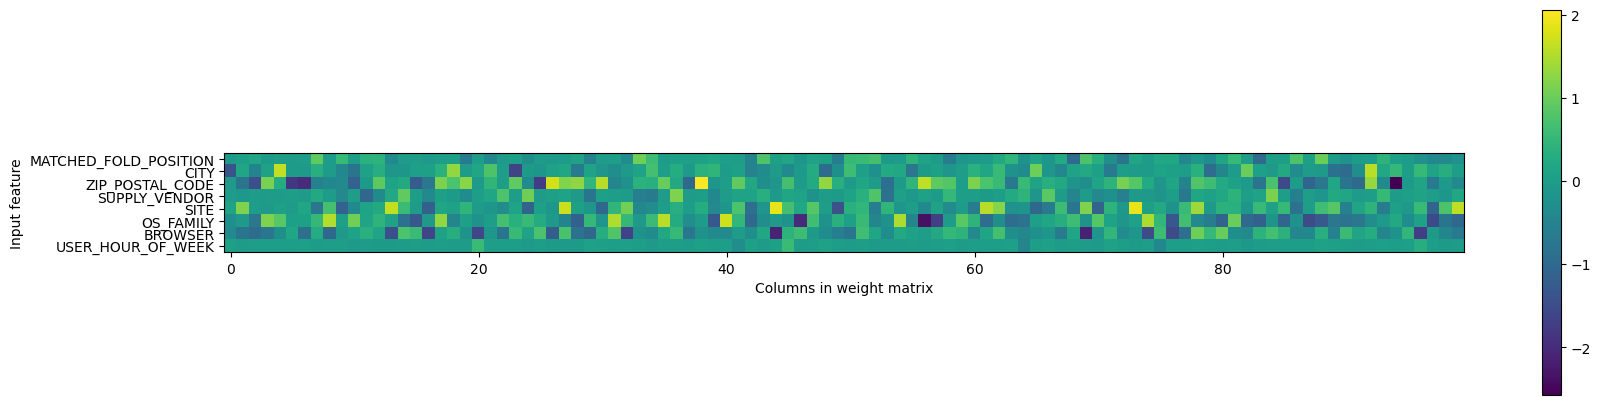

In [110]:
plt.figure(figsize=(20,5))
plt.imshow(classifier.coefs_[0][0:8], interpolation='none', cmap='viridis')
plt.yticks(range(8), np.array(X.columns)[0:8])
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

Shows weights learned connecting the input to the first hidden layer

Rows in the plot correspond to the 8 input features

Columns in plot correspond to the 100 hidden units

Feature that have very small weights for all hidden units are 'less important' to model

Could also visualize weight connecting the hidden layers to the output layer, but that is even harder to interpret

In [111]:
## Accuracy is one perfomrance metric here we will define several alternative metrics 

def modelPerformance(confMat):
    TN = confMat[0, 0]
    TP = confMat[1, 1]
    FP = confMat[0, 1]
    FN = confMat[1, 0]
    prec = TP / (TP + FP)
    rec = TP / (TP + FN)
    spec = TN / (TN + FP)
    fpr = FP / (TN + FP)
    f1 = 2 * (prec * rec) / (prec + rec)
    acc = (TP + TN) / (TP + FP + TN + FN)
    return (acc, prec, rec, spec, fpr, f1)

def printPerformance(confMat):
    acc, prec, rec, spec, fpr, f1 = modelPerformance(confMat)
    print("Accuracy = " "%.4f" % acc)
    print("Precision = " "%.4f" % prec)
    print("Recall = " "%.4f" % rec)
    print("Specificity = " "%.4f" % spec)
    print("False positive rate = " "%.4f" % fpr)
    print("F1-score = " "%.4f" % f1)
    np.set_printoptions(precision=2)
    print("Confusion matrix (%):")
    print(confMat/np.sum(confMat)*100)

In [115]:
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(y_test, y_pred)
cmat

array([[   0,    0,    0, ...,    0,   12,    0],
       [   0,    0,    0, ...,    0,    9,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,   11,    2,    0],
       [   0,    0,    0, ...,    0, 6528,    0],
       [   0,    0,    0, ...,    0,    3,    0]])

In [116]:

classifier = MLPClassifier(hidden_layer_sizes=(100,200), max_iter=50,activation = 'relu',solver='adam',random_state=42) ###  layer of 100 and 200 neruons 
#Fitting the training data to the network
classifier.fit(X_train_scaled, y_train)

#Using the trained network to predict

#Predicting y for X_val
#y_pred = classifier.predict(X_test_scaled)

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# from sklearn.metrics import confusion_matrix
# #Confusion matrix and metrics
# cmat = confusion_matrix(y_test, y_pred)
# printPerformance(cmat)

In [118]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score
preds_class = classifier.predict(X_test_scaled)
    
        
display(F'Accuracy Score: {accuracy_score(y_test, preds_class)}')
display(F"F1-Score: {f1_score(y_test, preds_class,average='weighted')}")

matrix = confusion_matrix(y_test, preds_class)
print('-'*50)
print('Confusion Matrix: ')
print(matrix)
print('-'*50)

'Accuracy Score: 0.5839841789306724'

'F1-Score: 0.5259339895734919'

--------------------------------------------------
Confusion Matrix: 
[[  11    0    0 ...    0    1    0]
 [   0    4    0 ...    0    8    0]
 [   0    0    0 ...    0    0    0]
 ...
 [   0    0    0 ...   64    1    0]
 [   0    0    0 ...    0 7771    0]
 [   0    0    0 ...    0    2    0]]
--------------------------------------------------


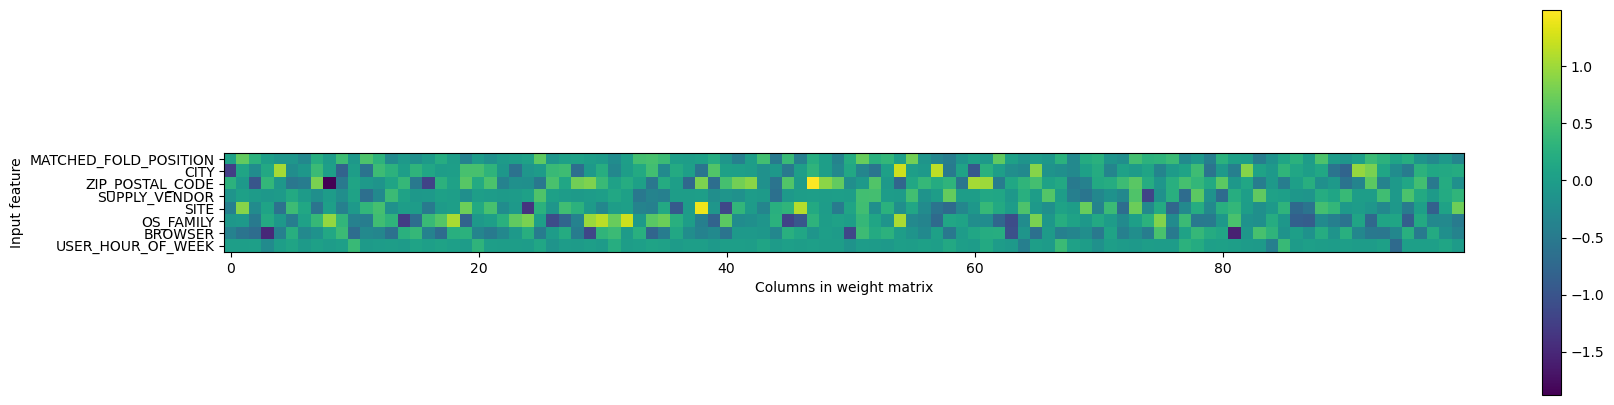

In [119]:

plt.figure(figsize=(20,5))
plt.imshow(classifier.coefs_[0][0:8], interpolation='none', cmap='viridis')
plt.yticks(range(8), np.array(X.columns)[0:8])
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()


In [120]:
from sklearn.model_selection import GridSearchCV
parameters = {'solver': ['adam'], 'max_iter': [30, 40, 50], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':[(50,100),(100,200),(50, 100,200), (100,200,300)] , 'random_state':[42], 'activation':['relu']}
clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)

In [121]:
parameters


{'solver': ['adam'],
 'max_iter': [300, 500, 700],
 'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07, 1.e-08,
        1.e-09]),
 'hidden_layer_sizes': [(50, 100),
  (100, 200),
  (50, 100, 200),
  (100, 200, 300)],
 'random_state': [42],
 'activation': ['relu']}

In [122]:
clf.fit(X_train_scaled, y_train)


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ec2-user

KeyboardInterrupt: 

In [ ]:
print(clf.best_params_)


In [ ]:
y_pred = clf.predict(X_test_scaled)


In [ ]:
print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score
y_pred = clf.predict(X_test_scaled)
    
        
display(F'Accuracy Score: {accuracy_score(y_test, y_pred)}')
display(F"F1-Score: {f1_score(y_test, y_pred,average='weighted')}")

matrix = confusion_matrix(y_test, preds_class)
print('-'*50)
print('Confusion Matrix: ')
print(matrix)
print('-'*50)

In [ ]:
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(y_test, y_pred)
printPerformance(cmat)

In [ ]:
parameters = {'solver': ['adam'], 'max_iter': [123,456,789], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':[(1,2),(3,4)] , 'random_state':[42], 'activation':['relu']}
clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)
### this may take 2-5 minutes to run depending on your hardware and no. hyperperamters
clf.fit(X_train_scaled, y_train)
#Predicting y for X_val
y_pred = clf.predict(X_test_scaled)
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(y_test, y_pred)
printPerformance(cmat)

In [ ]:
from sklearn.neural_network import MLPRegressor


Autoencoders (AEs)


In [ ]:
# Encoder structure
n_encoder1 = 300
n_encoder2 = 500

n_latent = 50

# Decoder structure
n_decoder2 = 300
n_decoder1 = 500

In [ ]:
reg = MLPRegressor(hidden_layer_sizes = (n_encoder1, n_encoder2, n_latent, n_decoder2, n_decoder1), 
                   activation = 'tanh', 
                   solver = 'adam', 
                   learning_rate_init = 0.001, 
                   max_iter = 100, # This is where we define the no.itterations/epochs in sklearn
                   tol = 0.000001, 
                   verbose = False)

In [ ]:
reg.fit(X_train_scaled, X_train_scaled)


In [ ]:
def encoder(data):
    data = np.asmatrix(data)
    
    encoder1 = data*reg.coefs_[0] + reg.intercepts_[0]
    encoder1 = (np.exp(encoder1) - np.exp(-encoder1))/(np.exp(encoder1) + np.exp(-encoder1))
    
    encoder2 = encoder1*reg.coefs_[1] + reg.intercepts_[1]
    encoder2 = (np.exp(encoder2) - np.exp(-encoder2))/(np.exp(encoder2) + np.exp(-encoder2))
    
    latent = encoder2*reg.coefs_[2] + reg.intercepts_[2]
    latent = (np.exp(latent) - np.exp(-latent))/(np.exp(latent) + np.exp(-latent))
    
    return np.asarray(latent)

In [ ]:
# Extract latent embeddings with trained encoder part of autoencoder
test_latent = encoder(X_test_scaled)
train_latent = encoder(X_train_scaled)

In [ ]:
plt.scatter(train_latent[:,0], train_latent[:,1], c=y_train, s=50, cmap='viridis')
plt.show()

In [ ]:
from sklearn.decomposition import PCA, SparsePCA, KernelPCA
pca = PCA(n_components=4)
pca_latent = pca.fit_transform(train_latent)
# run PCA with 4 components
# plot a scatterplot using seaborn
# the x axis will contain the first column of the pca scores x=pca_covid[:, 0]
plt.scatter(pca_latent[:, 0], pca_latent[:, 1], c=y_train, s=50, cmap='viridis')
plt.show()

We will now train an FFNN (Deep Learning: Feed Forward Neural Networks (FFNNs)
a.k.a. Multi-Layered Perceptrons (MLPs))  on this autoencoder generated latent space to predict bid conversion from Endeavour Data


In [ ]:
parameters = {'solver': ['adam'], 'max_iter': [300,500,700], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':[(50,100),(100,200),(50, 100,200), (100,200,300)] , 'random_state':[42], 'activation':['relu']}
clf_lat = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)

In [ ]:
### this may take 2-5 minutes to run depending on your hardware
clf_lat.fit(train_latent, y_train)


In [ ]:
#Predicting y for X_val
y_pred = clf_lat.predict(test_latent)
cmat = confusion_matrix(y_test, y_pred)
printPerformance(cmat)

In [ ]:
pca = PCA(n_components=50)
train_components = pca.fit_transform(X_train_scaled)
test_components = pca.transform(X_test_scaled)

In [ ]:
parameters = {'solver': ['adam'], 'max_iter': [300,500,700], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':[(50,100),(100,200),(50, 100,200), (100,200,300)] , 'random_state':[42], 'activation':['relu']}
clf_pca= GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)

### this may take 2-5 minutes to run depending on your hardware
clf_pca.fit(train_components, y_train)


#Predicting y for test data 
y_pred = clf_pca.predict(test_components)
cmat = confusion_matrix(y_test, y_pred)
printPerformance(cmat)

We can see that it is not performing as well as some of our previous models, however we have not tuned the hyperparamaters of this model. This can take a few hours to train an autoencoder to get a good performance. In an ideal setting we would itterate over various paramters however for today you can try change the dimensions of the latent space and see if you can get an improvement.

In [ ]:
#### Define variables to be used from the trained catboost model
##Training set
train = X_train_scaled
train['id_target'] = y_train
train = train.sample(frac=0.05)

#Testing Set
mydf = X_test_scaled
mydf['id_target'] = y_test
#Specify the column names that you will use for the bidlist (These are just example names)
col_list = ["MATCHED_FOLD_POSITION","CITY","ZIP_POSTAL_CODE","SUPPLY_VENDOR","SITE","OS_FAMILY","BROWSER","USER_HOUR_OF_WEEK","DEVICE_MODEL"]


In [ ]:
mydf = mydf.sample(frac=0.05)
mydf

In [ ]:

import pandas as pd
from ttd_api_authenticate import *
from TradedeskCredentials import *
from bid_lists_generator import *

def apply_bid_lists_to_adgroups(token, bid_list_ids, adgroupids, enable_on_apply=True, 
                                on_error='continue', verbose=False):
    #on_error in ['continue', 'raise']
    fails = []
    results = []
    for i, adgroup in enumerate(adgroupids):
        if verbose:
            printstr = f"Adding {len(bid_list_ids)} to adgroup {adgroup}"
            print(printstr, end='\r')
            print(' '*len(printstr), end='\r')
        try:
            current_state = generic_get(f'adgroup/{adgroup}', token=token).json()
        except Exception as e:
            if on_error == 'continue':
                fails.append(adgroup)
                continue
            elif on_error == 'raise':
                raise ValueError(f"Error getting adgroup id '{adgroup}' (index {i})")
        
        current_bid_lists = current_state['AssociatedBidLists']
        current_bid_lists.extend([{'BidListId':x, 
                                'IsEnabled':enable_on_apply} for x in bid_list_ids])
        payload={'AdGroupId':adgroup, 'AssociatedBidLists':current_bid_lists}
        try:
            result = generic_put('adgroup', token=token, payload=payload).json()
            results.append({adgroup:result['AssociatedBidLists']})
        except Exception as e:
            if on_error == 'continue':
                fails.append(adgroup)
                continue
            elif on_error == 'raise':
                raise ValueError(f"Error updating adgroup id '{adgroup}' (index {i})")
        print('Uploaded Successfully')

In [ ]:
def bid_col (mydf, col, target, num):
    df1 = mydf.loc[mydf[target] == 1, [col, target]]
    df2 = df1.groupby(col).agg(np.count_nonzero).sort_values(by = target, ascending=False)
    df3 = df2.iloc[0:num,]
    df3 = df3.reset_index()
    df3['key'] = 0
    return df3




In [ ]:


def df_list_make(train, col_list, targeted_id):
    df_list = []
    for i in col_list:
        j = bid_col (train, col = i, target = targeted_id, num = 100000)
        df_list.append(j)
    return df_list
df_list = df_list_make(train, col_list, targeted_id = 'id_target')
def cross_join (df_list, col_list):
    lenth = len(df_list)-1
    i = 0
    mydf = df_list[i]
    while i < lenth:
        mydf = pd.merge(mydf, df_list[i+1], on= 'key')
        i = i+1
    mydf = mydf[col_list]
    return mydf


In [ ]:
def cross_join(df_list, col_list):
    lenth = len(df_list)-1
    i = 0
    mydf = df_list[i]
    while i < lenth:
        mydf = pd.merge(mydf, df_list[i+1], on= 'key')
        i = i+1
    mydf = mydf[col_list]
    return mydf

In [ ]:
df_list = df_list_make(train, col_list, targeted_id = 'id_target')


In [ ]:
df_cross = cross_join(df_list, col_list)


In [ ]:
df_cross = df_cross.sample(frac=0.01)
df_cross

In [ ]:
probs = model.predict_proba(df_cross)
probs

In [ ]:
df_prob = pd.DataFrame({'0': probs[:, 0], '1': probs[:, 1]})
df_prob

In [ ]:
bid_model = df_cross

#reset index of each DataFrame
df_prob.reset_index(drop=True, inplace=True)
bid_model.reset_index(drop=True, inplace=True)

#column-bind two DataFrames
df3 = pd.concat([bid_model, df_prob], axis=1)
bid_model = df3
bid_model

In [ ]:
bid_model['zip'] =bid_model['zip'].round(0)

bid_model['zip'] = bid_model['zip'].astype(int)
bid_model